# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the most effective drugs. They have the smallest tumor volumes of the rest of the group. 
- As a result of their effectiveness, it appears that the most testing has been with those two drugs. Those two drugs have the highest numbers of observations.
- The sex distribution was very balanced, being almost 50% male and 50% female.
- The regression analysis showed a strong correlation between weight of the mouse, and the average volume of the tumor. The r value was 0.84. It's likely that larger mice have larger tumors.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False),:]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mouse_results.loc[mouse_results['Mouse ID'] != 'g989', :]
clean_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_mice_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor = clean_mice_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor = clean_mice_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor = clean_mice_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor = clean_mice_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

regimen_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})

regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

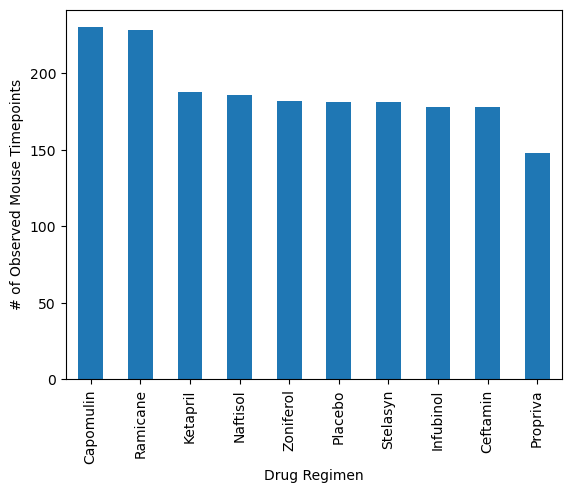

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_bar = clean_mice_data["Drug Regimen"].value_counts().plot(kind="bar")

pd_bar.set_ylabel ("# of Observed Mouse Timepoints")

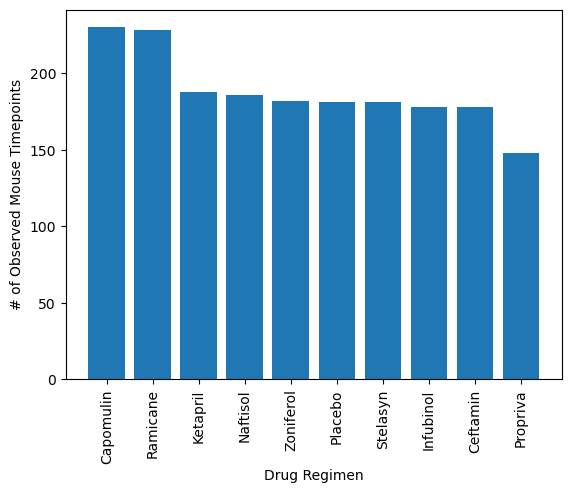

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_mice_data["Drug Regimen"].value_counts()
drug_counts

plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

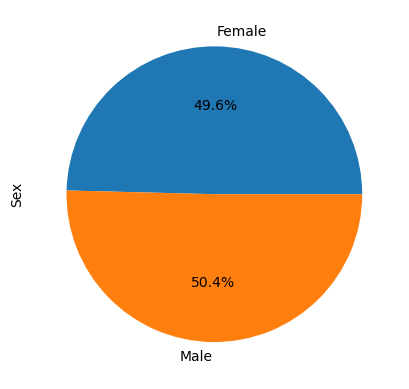

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mice_data.groupby('Sex')['Mouse ID'].nunique()

pd_pie = sex_counts.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')
pd_pie

<function matplotlib.pyplot.show(close=None, block=None)>

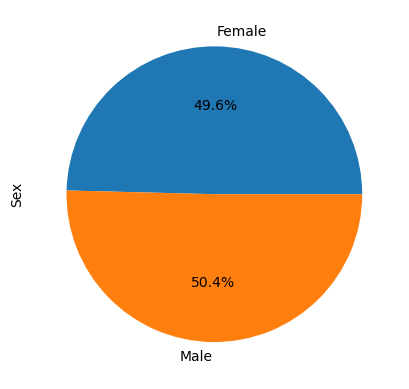

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint, clean_mice_data, on=['Mouse ID','Timepoint'], how='left')

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
selected_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in selected_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s interquartile range: {iqr}")
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's interquartile range: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's interquartile range: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's interquartile range: 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's interquartile range: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


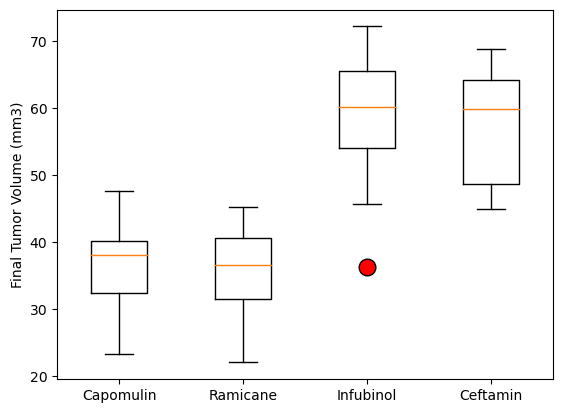

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(total_tumor_vol, labels=selected_treatments,flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

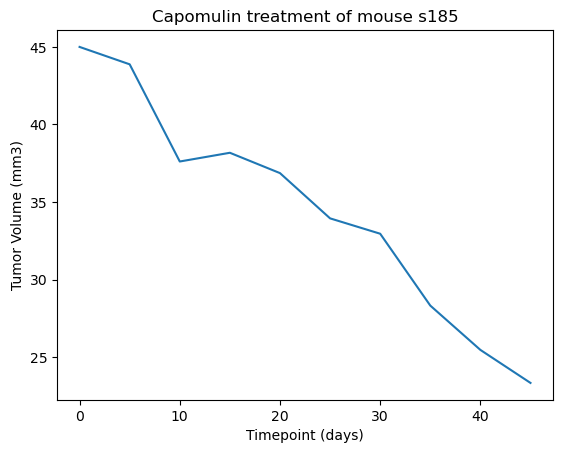

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin',:]
capomulin_mouse = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 's185',:]

x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment of mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

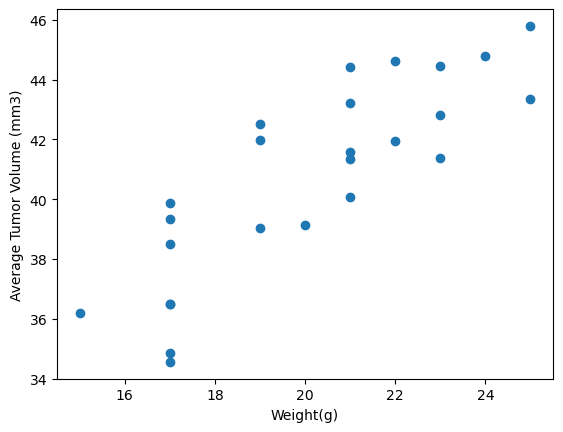

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_weights = capomulin_mice.groupby(['Mouse ID'])['Weight (g)'].mean()
avg_tumor_vol = capomulin_mice.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
plt.scatter(avg_weights, avg_tumor_vol)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


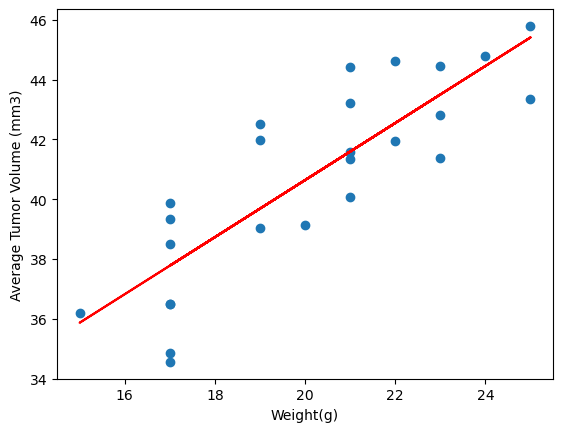

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(avg_weights,avg_tumor_vol)[0],2)}")
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(avg_weights, avg_tumor_vol)
cap_fit = cap_slope * avg_weights + cap_int
plt.scatter(avg_weights, avg_tumor_vol)
plt.plot(avg_weights,cap_fit,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()